In [1]:
# Bibliotecas y variables de ambiente
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.metrics import confusion_matrix
import sklearn.metrics as slm
import seaborn as sns
import os
from sklearn.svm import SVC
#os.chdir()
print("Bibliotecas cargadas.")


Bibliotecas cargadas.


In [2]:
# 1. LECTURA DE DATOS
def carga():
    global X1, y1, X2, y2, data1, data2
    
    # Data 1: BUPA liver disorders
    data1 = pd.read_csv("bupa.data", names=["mcv", "alkphos", "sgpt", "sgot", "gammagt", "drinks", "selector"])
    y1 = data1["drinks"]
    c = 0
    for i in y1:
        if (i >= 6): y1[c] = 1
        else: y1[c] = 0
        c += 1
    y1 = y1.astype('int')
    dropList1 = ["selector", "drinks"]
    data1 = data1.drop(dropList1, axis="columns")
    X1 = data1

    print("Data 1: BUPA liver disorders")
    print(y1.head())
    print(X1.head())
    print("\n")
    
    # Data2: Lung Cancer Data
    data2 = pd.read_csv("lung-cancer.data", names=range(57))
    data2.replace('?', np.nan, inplace=True)
    imp = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")
    data2 = pd.DataFrame(imp.fit_transform(data2))
    y2 = data2[0].astype('int')
    dropList2 = [0]
    data2 = data2.drop(dropList2, axis="columns")
    X2 = data2
    
    print("Data2: Lung Cancer Data")
    print(y2.head())
    print(X2.head())
    print("\n")
    pass
carga()


Data 1: BUPA liver disorders
0    0
1    0
2    0
3    0
4    0
Name: drinks, dtype: int32
   mcv  alkphos  sgpt  sgot  gammagt
0   85       92    45    27       31
1   85       64    59    32       23
2   86       54    33    16       54
3   91       78    34    24       36
4   87       70    12    28       10


Data2: Lung Cancer Data
0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int32
  1  2  3  4  5  6  7  8  9  10  ... 47 48 49 50 51 52 53 54 55 56
0  0  3  0  1  0  2  2  2  1  1  ...  2  2  2  2  2  1  1  1  2  2
1  0  3  3  1  0  3  1  3  1  1  ...  2  2  2  2  2  2  2  1  2  2
2  0  3  3  2  0  3  3  3  1  1  ...  2  2  2  2  2  2  2  2  1  2
3  0  2  3  2  1  3  3  3  1  2  ...  2  2  2  2  2  2  2  2  2  2
4  0  3  2  1  1  3  3  3  2  2  ...  2  2  2  2  2  2  2  1  2  2

[5 rows x 56 columns]




In [3]:
# 2. EJECUCIÓN DE REGRESIÓN LOGÍSTICA

def logisticR(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    lg=LogisticRegression()
    lg.fit(X_train,y_train)
    predictions = lg.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:")
    print(cm)
    scores = cross_val_score(lg, X, y, cv=10)
    print("Scores:")
    print(scores)
    print("Accuracy:\n %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    pass


print("Regresion Data1:\n")
logisticR(X1, y1)

print("\nRegresion Data2:\n")
logisticR(X2, y2)


Regresion Data1:

Confusion Matrix:
[[43  4]
 [16  6]]
Scores:
[0.77142857 0.74285714 0.74285714 0.74285714 0.8        0.88235294
 0.85294118 0.70588235 0.79411765 0.73529412]
Accuracy:
 0.78 (+/- 0.11)

Regresion Data2:

Confusion Matrix:
[[1 2 0]
 [2 0 0]
 [0 0 2]]
Scores:
[0.25       0.5        0.33333333 0.33333333 0.66666667 0.33333333
 1.         0.33333333 0.33333333 0.        ]
Accuracy:
 0.41 (+/- 0.51)


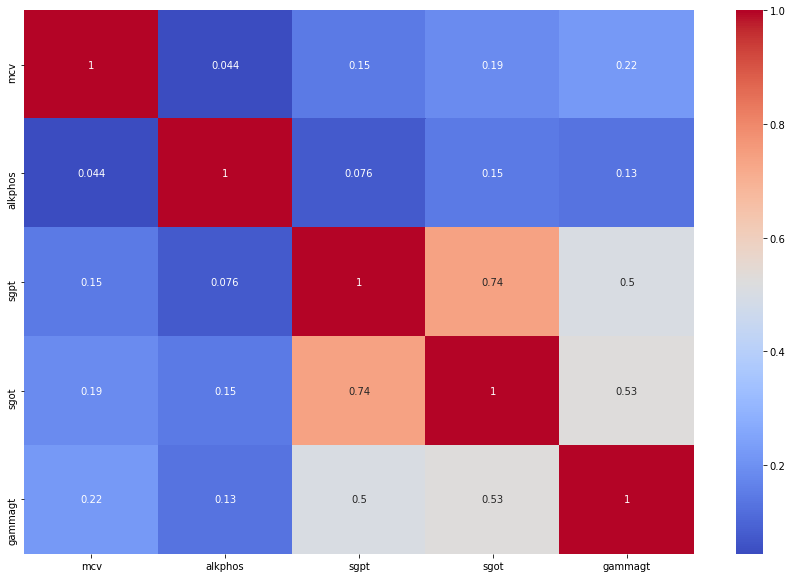

New X1: BUPA liver disorders
   mcv  alkphos  gammagt
0   85       92       31
1   85       64       23
2   86       54       54
3   91       78       36
4   87       70       10




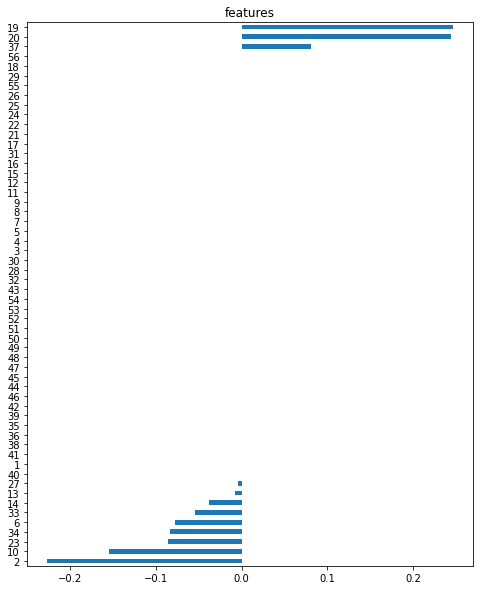

New X2: Lung Cancer Data
  2  6  10 13 14 19 20 23 27 33 34 37
0  3  2  1  3  2  0  2  2  2  3  3  1
1  3  3  1  1  3  0  0  2  3  3  3  2
2  3  3  1  3  3  0  0  2  3  3  1  1
3  2  3  2  3  3  0  0  2  2  3  1  1
4  3  3  2  1  2  0  0  2  3  3  2  2


New Regresion Data1:

Confusion Matrix:
[[55  1]
 [12  1]]
Scores:
[0.74285714 0.8        0.74285714 0.8        0.8        0.85294118
 0.85294118 0.70588235 0.82352941 0.76470588]
Accuracy:
 0.79 (+/- 0.09)

New Regresion Data2:

Confusion Matrix:
[[1 0 0]
 [1 1 2]
 [0 0 2]]
Scores:
[0.25       0.75       0.66666667 0.33333333 1.         0.66666667
 1.         1.         0.66666667 0.        ]
Accuracy:
 0.63 (+/- 0.65)


In [4]:
# 3. TECNICAS DE SELECCION DE CARACTERISTICAS

def plot_corr(data):
    correlation = data.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.show()
    pass

def lasso(X,y):
    reg=LassoCV(random_state=2)
    reg.fit(X,y)
    coef = pd.Series(reg.coef_, index=X.columns)
    newDL = []
    c = 1
    for i in coef:
        if (i == 0): newDL.append(c)
        c += 1
    #Visualizacion grafica
    coefS=coef.sort_values()
    matplotlib.rcParams['figure.figsize']=(8.0,10.0)
    coefS.plot(kind="barh")
    plt.title("features")
    plt.show()
    return newDL


# Eliminando features con altas correlaciones
plot_corr(data1)
newDropList1 = ["sgpt", "sgot"]
data1 = data1.drop(newDropList1, axis="columns")
X1 = data1

print("New X1: BUPA liver disorders")
print(X1.head())
print("\n")

# Eliminando features con poco impacto a la generacion de datos
newDropList2 = lasso(X2, y2)
data2 = data2.drop(newDropList2, axis="columns")
X2 = data2

print("New X2: Lung Cancer Data")
print(X2.head())
print("\n")

print("New Regresion Data1:\n")
logisticR(X1, y1)

print("\nNew Regresion Data2:\n")
logisticR(X2, y2)